# 이미지 로딩

In [1]:
import cv2

img = cv2.imread('data/img_1115.jpg')

cv2.imshow('img', img) # 띄워질 창의 이름, 사용 이미지
cv2.waitKey(1000) # 닫는 기능, 1000ms = 1초
                  # 시간내에 아무 키보드 버튼을 누르면 종료
                  # 0 = 계속 대기
cv2.destroyAllWindows() # 실행이 되면 윈도우창 종료

In [2]:
def end(ms=0): # ms 기본값 0
    cv2.waitKey(ms)
    cv2.destroyAllWindows()

In [3]:
import cv2

img = cv2.imread('data/img_1115.jpg')

cv2.imshow('img', img)
end(1000)

# 색상 공간을 변환
- RGB, HSV, Gray, BGR, RGBA

In [4]:
import cv2

img = cv2.imread('data/img_1115.jpg') # RGB

# 색상공간을 변환
img_cvt = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow('Gray',img_cvt)
end(1000)

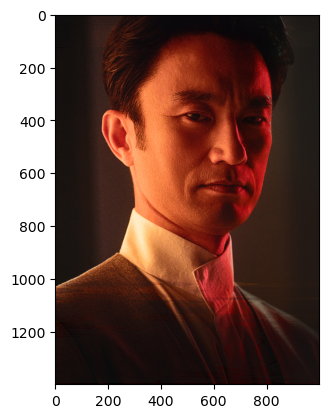

In [5]:
import matplotlib.pyplot as plt
# matplotlib은 기본 색상 체계가 BGR
plt.imshow(img_cvt)

# 이진이미지 만들기
- 픽셀값이 0, 255만 존재
- 흑백사진이기 때문에 GrayScale로 받아옴

In [6]:
import cv2

img = cv2.imread('data/img_1115.jpg', cv2.IMREAD_GRAYSCALE)

# threshold(이미지, 문턱값, 문턱값 초과시 변환값, 이진이미지 속성)
ret, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('gray', thr1)
end()

# 동영상 출력하기
- 동영상 출력하기
- 캡쳐하기
- 녹화하기

In [7]:
import cv2

# 동영상을 이미지로 잘라서 가져온 상태
cap = cv2.VideoCapture('data/video.mp4')

while True:
    # 동영상에서 이미지 한장씩 읽어오기
    # ret = 사진 가져오면 True, 못가져오면 False
    # frame = 이미지 1장
    ret, frame = cap.read()
    
    if not ret: # ret이 False일때 동작
        print('이미지를 불러오지 못했습니다.')
        cap.release() # 비디오 객체 종료
        cv2.destroyAllWindows()
        break
        
    # 이미지 출력
    cv2.imshow('video', frame)
    cv2.waitKey(33) # 1장의 사진을 fps(1/30) ms 만큼만 보여줘
                     # 1000ms = 1초
                     # 1초에 약 30장의 이미지 출력
    # 일반적인 동영상은 초당 30장의 이미지를 출력

이미지를 불러오지 못했습니다.


In [8]:
import cv2

cap = cv2.VideoCapture('data/video.mp4')
count = 0 # 파일 이름 인덱스용

# 비디오 객체 생성
fps = 30 # 초당 30장의 이미지 저장
w = int(cap.get(3)) # 이미지의 가로 크기
h = int(cap.get(4)) # 이미지의 세로 크기
fcc = cv2.VideoWriter_fourcc(*'MPEG') # mp4용 코덱
                                      # *'DIVX' = avi용 코덱
out = cv2.VideoWriter('data/cap_video.mp4', fcc, fps, (w,h))
# out 객체에 사진을 계속 넣어준면 동영상 완성

# 녹화여부
record = False

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('이미지를 불러오지 못했습니다.')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow('video', frame)
    
    if record:
        out.write(frame)
        
    # k변수에는 키보드로 입력한 값이 저장
    k = cv2.waitKey(8)
    
    # 종료기능 만들기(1)
    if k == 49: # ASC코드로 1을 의미
        print('종료합니다')
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    # 캡쳐기능 만들기(2)
    if k == 50:
        print(f'data/cap{count}.jpg 에 사진을 저장합니다')
        cv2.imwrite(f'data/cap{count}.jpg', frame,
                   params=[cv2.IMWRITE_JPEG_PROGRESSIVE, 0])
        count += 1
        
    # 녹화기능 만들기
    # 녹화 시작(3)
    if k == 51:
        print('녹화 시작')
        record = True

    # 녹화 종료(4)
    if k == 52:
        record = False
        out.release() # out 객체를 종료
        print('녹화 종료')

이미지를 불러오지 못했습니다.


# 캡쳐 사진으로 동영상 만들기

In [9]:
import cv2

cap = cv2.VideoCapture('data/video.mp4')

fps = 5 # 초당 5장의 이미지 저장
w = int(cap.get(3)) # 이미지의 가로 크기
h = int(cap.get(4)) # 이미지의 세로 크기
fcc = cv2.VideoWriter_fourcc(*'MPEG')

out = cv2.VideoWriter('data/movie.mp4', fcc, fps, (w,h))

# 캡쳐한 파일을 한장씩 읽어와서 동영상으로 만들자
for i in range(22):
    # 이미지 읽기
    img = cv2.imread(f'data/cap{i}.jpg')
    out.write(img)
    
out.release()